In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Load the Universities.csv dataset and check the head
df = pd.read_csv('Universities.csv')
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
# scale the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[1:])

In [4]:
# finding optimum number of clusters using elbow method
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wss.append(kmeans.inertia_)

In [5]:
wss

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.90780792628937,
 22.452524599848378,
 18.750021301705342,
 16.00657366889506,
 13.51107215641083,
 10.729002092323686]

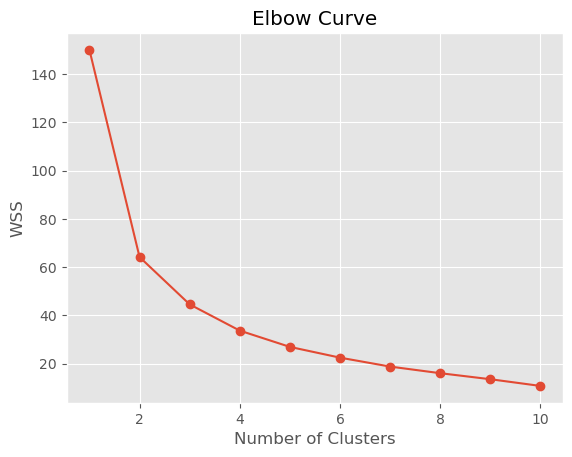

In [7]:
# plot the elbow curve
plt.plot(range(1,11), wss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS');

In [8]:
# optimum number of cluster is 2. implement a kmeans clustering modek with k =2 and get the labels
km2 = KMeans(n_clusters=2, random_state=42)
km2.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

In [9]:
# add labels to the original dataset as a new column
labels = km2.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int32)

In [10]:
df['cluster_labels'] = labels
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_labels
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1


In [11]:
# cluster profiles
df.iloc[:,1:].groupby('cluster_labels').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster_labels,,,,,,
0,1085.20,44.0,69.6,18.60,11056.4,74.4
1,1311.75,84.6,31.6,11.25,31470.9,89.8


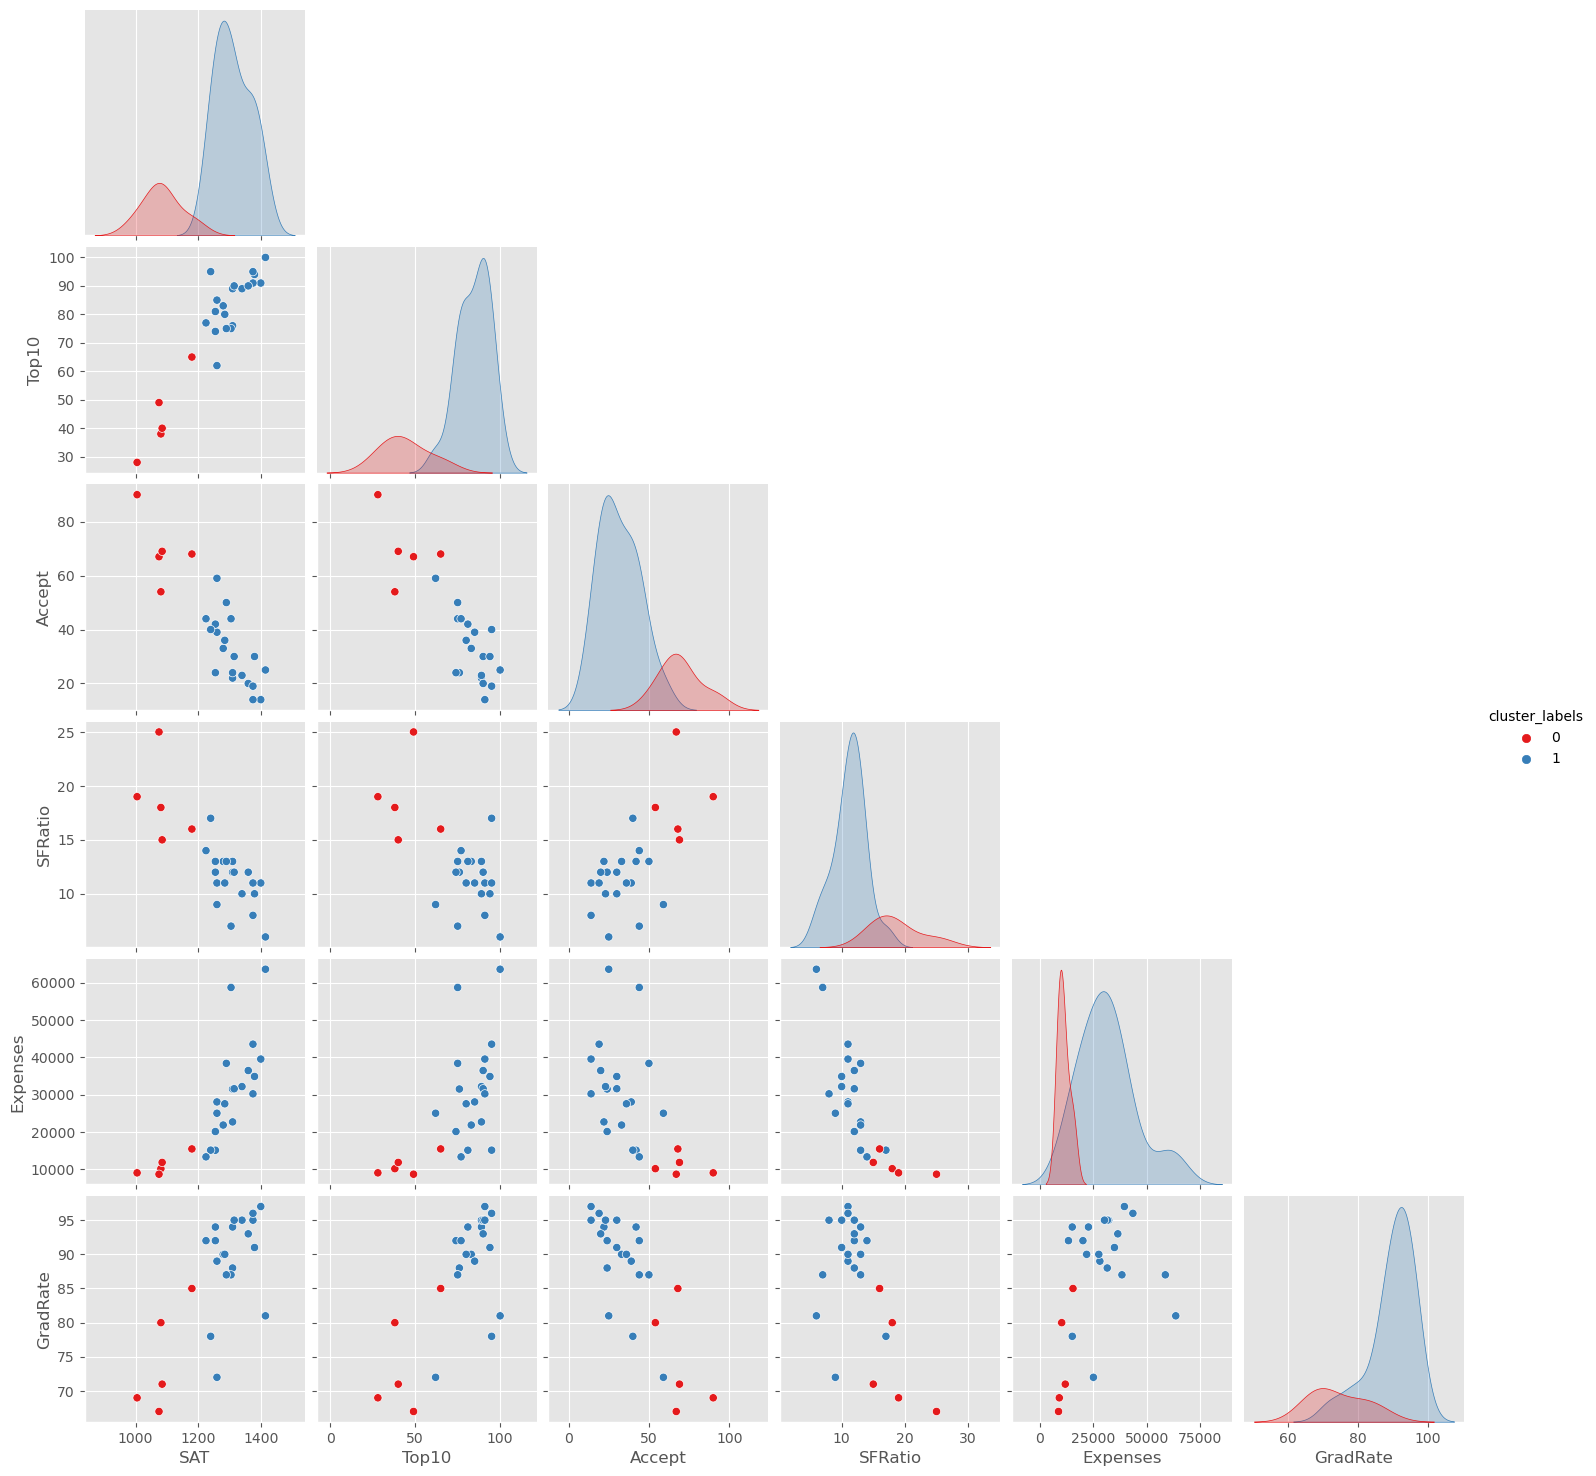

In [13]:
# plot a pairplot with cluster label as hue
sns.pairplot(df, hue='cluster_labels', palette='Set1',corner=True);

In [14]:
# sihouette score for a set of cluster numbers
ss = []
from sklearn.metrics import silhouette_score
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_df)
    ss.append(silhouette_score(scaled_df, km.labels_))

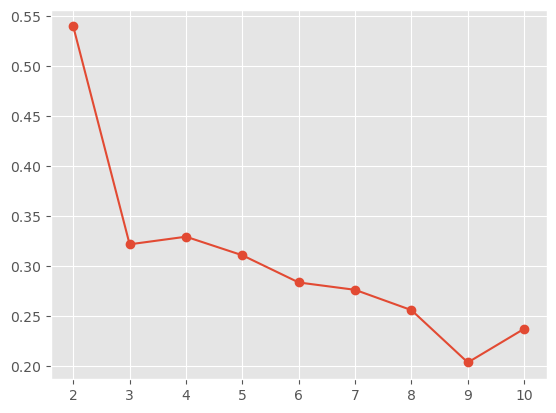

In [15]:
plt.plot(range(2,11), ss, marker='o');